# Exploratory Data Analysis of the Spotify Top 200 Charts
In ths notebook, we will explore Spotify's Top 200 Charts by **region** and **date**. The dataset is scarped from [Spotify's official Top Charts Website](https://spotifycharts.com/regional/).

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import pathlib

In [2]:
# Load the dataset
filepath = pathlib.Path("data/all_regions_top_200_daily.csv")

if filepath.exists():
    data_df = pd.read_csv(filepath, parse_dates=True)
else:
    data_df = pd.DataFrame()
    
data_df.head()

,Position,Track Name,Artist,Streams,date,region,spotify_id
0,1.0,Starboy,The Weeknd,3135625.0,2017-01-01,global,5aAx2yezTd8zXrkmtKl66Z
1,2.0,Closer,The Chainsmokers,3015525.0,2017-01-01,global,7BKLCZ1jbUBVqRi2FVlTVw
2,3.0,Let Me Love You,DJ Snake,2545384.0,2017-01-01,global,4pdPtRcBmOSQDlJ3Fk945m
3,4.0,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604.0,2017-01-01,global,5knuzwU65gJK7IF5yJsuaW
4,5.0,One Dance,Drake,2259887.0,2017-01-01,global,1xznGGDReH1oQq0xzbwXa3


In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17703738 entries, 0 to 17703737
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Position    float64
 1   Track Name  object 
 2   Artist      object 
 3   Streams     float64
 4   date        object 
 5   region      object 
 6   spotify_id  object 
dtypes: float64(2), object(5)
memory usage: 945.5+ MB


In [4]:
data_df.describe()

,Position,Streams
count,1.554554e+07,1.554554e+07
mean,9.673980e+01,5.655417e+04
std,5.758853e+01,2.105495e+05
min,1.000000e+00,1.001000e+03
25%,4.700000e+01,3.672000e+03
50%,9.500000e+01,1.003300e+04
75%,1.460000e+02,3.571700e+04
max,2.000000e+02,1.722324e+07


In [5]:
data_df_cleaned = data_df.dropna()
data_df_cleaned.head()

,Position,Track Name,Artist,Streams,date,region,spotify_id
0,1.0,Starboy,The Weeknd,3135625.0,2017-01-01,global,5aAx2yezTd8zXrkmtKl66Z
1,2.0,Closer,The Chainsmokers,3015525.0,2017-01-01,global,7BKLCZ1jbUBVqRi2FVlTVw
2,3.0,Let Me Love You,DJ Snake,2545384.0,2017-01-01,global,4pdPtRcBmOSQDlJ3Fk945m
3,4.0,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604.0,2017-01-01,global,5knuzwU65gJK7IF5yJsuaW
4,5.0,One Dance,Drake,2259887.0,2017-01-01,global,1xznGGDReH1oQq0xzbwXa3


In [6]:
# Clearing unused memory
data_df = None

In [7]:
data_df_cleaned['region'].unique()

array(['global', 'ar', 'at', 'au', 'be', 'bg', 'bo', 'br', 'ca', 'ch',
       'cl', 'co', 'cr', 'cz', 'de', 'dk', 'do', 'ec', 'ee', 'es', 'fi',
       'fr', 'gb', 'gr', 'gt', 'hk', 'hn', 'hu', 'id', 'ie', 'is', 'it',
       'jp', 'lt', 'lu', 'lv', 'mx', 'my', 'ni', 'nl', 'no', 'nz', 'pa',
       'pe', 'ph', 'pl', 'pt', 'py', 'se', 'sg', 'sk', 'sv', 'tr', 'tw',
       'us', 'uy', 'th', 'il', 'ro', 'vn'], dtype=object)

Now we will determine the regions with the most number of streams. These will be used to understand how the global trends in music are observed.

In [8]:
# Display top 20 regions with the highest total streams between 2017 and 2021
data_df_cleaned.groupby(["region"]).sum().sort_values(by="Streams", ascending=False).head(20)

,Position,Streams
region,,
global,29867706.0,3.506753e+11
us,29907277.0,1.171383e+11
br,29882152.0,4.060851e+10
mx,29882225.0,3.529269e+10
de,29809477.0,3.293648e+10
gb,29888090.0,3.032301e+10
es,29866158.0,2.098100e+10
it,29847149.0,1.991240e+10
fr,29907952.0,1.900275e+10


In [9]:
len(['global', 'ar', 'at', 'au', 'be', 'bg', 'bo', 'br', 'ca', 'ch',
       'cl', 'co', 'cr', 'cz', 'de', 'dk', 'do', 'ec', 'ee', 'es', 'fi',
       'fr', 'gb', 'gr', 'gt', 'hk', 'hn', 'hu', 'id', 'ie', 'is', 'it',
       'jp', 'lt', 'lu', 'lv', 'mx', 'my', 'ni', 'nl', 'no', 'nz', 'pa',
       'pe', 'ph', 'pl', 'pt', 'py', 'se', 'sg', 'sk', 'sv', 'tr', 'tw',
       'us', 'uy', 'th', 'il', 'ro', 'vn'])

60

The following regions will be considered for the analysis:
- Global (`global`)
- United States (`us`)
- Brazil (`br`)
- Germany (`de`)
- UK (`gb`)
- Spain (`es`)
- Canada (`ca`)

Hence, data about all other regions will be removed.

In [10]:
data_df_cleaned[data_df_cleaned["region"] == "id"].head()

,Position,Track Name,Artist,Streams,date,region,spotify_id
4902,1.0,Closer,The Chainsmokers,45330.0,2017-01-01,id,7BKLCZ1jbUBVqRi2FVlTVw
4903,2.0,Say You Won't Let Go,James Arthur,40815.0,2017-01-01,id,5uCax9HTNlzGybIStD3vDh
4904,3.0,All We Know,The Chainsmokers,39557.0,2017-01-01,id,2rizacJSyD9S1IQUxUxnsK
4905,4.0,Let Me Love You,DJ Snake,35205.0,2017-01-01,id,4pdPtRcBmOSQDlJ3Fk945m
4906,5.0,Don't Wanna Know,Maroon 5,34084.0,2017-01-01,id,5MFzQMkrl1FOOng9tq6R9r


In [11]:
regions = {"global": "global",
           "united states": "us",
           "brazil": "br",
           "germany": "de",
           "united kingdom": "gb",
           "spain": "es",
           "canada": "ca"
           }

In [12]:
df = data_df_cleaned[data_df_cleaned["region"].isin(regions.values())].copy()
df_cleaned = data_df_cleaned[data_df_cleaned["region"].isin(regions.values())].copy()
df.head()

,Position,Track Name,Artist,Streams,date,region,spotify_id
0,1.0,Starboy,The Weeknd,3135625.0,2017-01-01,global,5aAx2yezTd8zXrkmtKl66Z
1,2.0,Closer,The Chainsmokers,3015525.0,2017-01-01,global,7BKLCZ1jbUBVqRi2FVlTVw
2,3.0,Let Me Love You,DJ Snake,2545384.0,2017-01-01,global,4pdPtRcBmOSQDlJ3Fk945m
3,4.0,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604.0,2017-01-01,global,5knuzwU65gJK7IF5yJsuaW
4,5.0,One Dance,Drake,2259887.0,2017-01-01,global,1xznGGDReH1oQq0xzbwXa3


In [13]:
data_df_cleaned = None

In [14]:
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")
df.head()

,Position,Track Name,Artist,Streams,date,region,spotify_id
0,1.0,Starboy,The Weeknd,3135625.0,2017-01-01,global,5aAx2yezTd8zXrkmtKl66Z
1,2.0,Closer,The Chainsmokers,3015525.0,2017-01-01,global,7BKLCZ1jbUBVqRi2FVlTVw
2,3.0,Let Me Love You,DJ Snake,2545384.0,2017-01-01,global,4pdPtRcBmOSQDlJ3Fk945m
3,4.0,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604.0,2017-01-01,global,5knuzwU65gJK7IF5yJsuaW
4,5.0,One Dance,Drake,2259887.0,2017-01-01,global,1xznGGDReH1oQq0xzbwXa3


In [15]:
df.set_index(["date", "Position"], inplace=True)
df.head()

Track Name  \
date       Position                                            
2017-01-01 1.0                                       Starboy   
           2.0                                        Closer   
           3.0                               Let Me Love You   
           4.0       Rockabye (feat. Sean Paul & Anne-Marie)   
           5.0                                     One Dance   

                               Artist    Streams  region  \
date       Position                                        
2017-01-01 1.0             The Weeknd  3135625.0  global   
           2.0       The Chainsmokers  3015525.0  global   
           3.0               DJ Snake  2545384.0  global   
           4.0           Clean Bandit  2356604.0  global   
           5.0                  Drake  2259887.0  global   

                                 spotify_id  
date       Position                          
2017-01-01 1.0       5aAx2yezTd8zXrkmtKl66Z  
           2.0       7BKLCZ1jbUBVqRi2FVlTVw  
           3.0       4pdPtRcBmOSQDlJ3Fk945m  
           4.0       5knuzwU65gJK7IF5yJsuaW  
           5.0       1xznGGDReH1oQq0xzbwXa3

In [16]:
df.groupby(["Track Name", "date"]).sum()

Streams
Track Name     date                 
!              2019-08-09  2202702.0
               2019-08-10  1188671.0
               2019-08-11   363833.0
               2019-08-12   349870.0
               2019-08-13   297367.0
...                              ...
美女と野獣          2017-06-05    47780.0
               2017-06-06    35973.0
蓝 - Cuéntamelo 2019-11-10    27517.0
               2019-11-24    29534.0
說好不哭           2019-09-17    33493.0

[1130803 rows x 1 columns]

In [17]:
df[df['region'] == "global"].groupby(["Artist"]).mean().sort_values(by="Streams", ascending=False).head(20)

,Streams
Artist,
Olivia Rodrigo,3.296031e+06
Tones And I,2.923192e+06
SAINt JHN,2.673830e+06
Wham!,2.558298e+06
Internet Money,2.537534e+06
Jawsh 685,2.455353e+06
Mariah Carey,2.407342e+06
24kGoldn,2.348576e+06
Powfu,2.322816e+06


In [18]:
df.groupby(["Track Name", "Artist"]).sum().sort_values(by="Streams", ascending=False).head(20)

,,Streams
Track Name,Artist,
Shape of You,Ed Sheeran,3.624923e+09
Dance Monkey,Tones And I,2.804261e+09
Blinding Lights,The Weeknd,2.687621e+09
Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,2.685540e+09
Someone You Loved,Lewis Capaldi,2.424276e+09
Lucid Dreams,Juice WRLD,2.411695e+09
bad guy,Billie Eilish,2.389620e+09
Señorita,Shawn Mendes,2.284298e+09
God's Plan,Drake,2.267490e+09


In [19]:
df['Artist'].value_counts()

Post Malone          47302
Ed Sheeran           42122
Drake                36578
Billie Eilish        27524
XXXTENTACION         27099
                     ...  
Phats & Small            1
Lazy Lizzard Gang        1
Nu51                     1
Llane                    1
Lea Michele              1
Name: Artist, Length: 3624, dtype: int64

In [20]:
# level_values = df["Track Name"].unique()
level_values = df.index.get_level_values
result = (df.groupby([level_values(i) for i in [0,1]]
                     +[pd.Grouper(freq='1y', level="date")]).sum())
result

Streams
date       Position date                 
2017-01-01 1.0      2017-12-31  5949703.0
           2.0      2017-12-31  5160844.0
           3.0      2017-12-31  4474651.0
           4.0      2017-12-31  4166103.0
           5.0      2017-12-31  3911050.0
...                                   ...
2021-01-30 196.0    2021-12-31  1234281.0
           197.0    2021-12-31  1232348.0
           198.0    2021-12-31  1228851.0
           199.0    2021-12-31  1223439.0
           200.0    2021-12-31  1222065.0

[297600 rows x 1 columns]

In [21]:
result = (df.groupby("Track Name").mean()).sort_values(by="Streams", ascending=False).head(10)
result

,Streams
Track Name,
drivers license,2.299412e+06
DÁKITI,1.454246e+06
I'm the One,1.267468e+06
LA NOCHE DE ANOCHE,1.230889e+06
Allenamento #4,1.227269e+06
MEVTR,1.216093e+06
BICHOTA,1.180652e+06
Celsius,1.168772e+06
Don’t Matter To Me,1.153293e+06


In [22]:
df

Track Name  \
date       Position                                            
2017-01-01 1.0                                       Starboy   
           2.0                                        Closer   
           3.0                               Let Me Love You   
           4.0       Rockabye (feat. Sean Paul & Anne-Marie)   
           5.0                                     One Dance   
...                                                      ...   
2021-01-30 196.0                           Take Me To Church   
           197.0                                 Mr Loverman   
           198.0                                I Fall Apart   
           199.0                                  Kacey Talk   
           200.0                                         F.N   

                                         Artist    Streams  region  \
date       Position                                                  
2017-01-01 1.0                       The Weeknd  3135625.0  global   
           2.0                 The Chainsmokers  3015525.0  global   
           3.0                         DJ Snake  2545384.0  global   
           4.0                     Clean Bandit  2356604.0  global   
           5.0                            Drake  2259887.0  global   
...                                         ...        ...     ...   
2021-01-30 196.0                         Hozier   216177.0      us   
           197.0               Ricky Montgomery   216126.0      us   
           198.0                    Post Malone   215343.0      us   
           199.0     YoungBoy Never Broke Again   215179.0      us   
           200.0                       Lil Tjay   215054.0      us   

                                 spotify_id  
date       Position                          
2017-01-01 1.0       5aAx2yezTd8zXrkmtKl66Z  
           2.0       7BKLCZ1jbUBVqRi2FVlTVw  
           3.0       4pdPtRcBmOSQDlJ3Fk945m  
           4.0       5knuzwU65gJK7IF5yJsuaW  
           5.0       1xznGGDReH1oQq0xzbwXa3  
...                                     ...  
2021-01-30 196.0     3dYD57lRAUcMHufyqn9GcI  
           197.0     2IVsRhKrx8hlQBOWy4qebo  
           198.0     75ZvA4QfFiZvzhj2xkaWAh  
           199.0     1SF8piqsZWn86DajVKih8F  
           200.0     0RLLvYBopDwooCyvnTwgYu  

[2079842 rows x 5 columns]

In [23]:
kaggle_df = pd.read_csv("data/kaggle_spotify_data.csv")
kaggle_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [26]:
kaggle_df.set_index("id").head()

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
id,,,,,,,,,,,,,,,,,,
0cS0A1fUEUd1EW3FcF8AEI,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
0hbkKFIJm7Z05H8Zl9w30f,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
11m7laMUgmOKqI3oYzuhne,0.993000,['Mamie Smith'],0.647,163827,0.186,0,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
19Lc5SfJJ5O1oaxY0fpwfh,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
2hJjbsLCytGsnAHfdsLejp,0.295000,['Mixe'],0.704,165224,0.707,1,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [29]:
df_cleaned.set_index("spotify_id").head()

,Position,Track Name,Artist,Streams,date,region
spotify_id,,,,,,
5aAx2yezTd8zXrkmtKl66Z,1.0,Starboy,The Weeknd,3135625.0,2017-01-01,global
7BKLCZ1jbUBVqRi2FVlTVw,2.0,Closer,The Chainsmokers,3015525.0,2017-01-01,global
4pdPtRcBmOSQDlJ3Fk945m,3.0,Let Me Love You,DJ Snake,2545384.0,2017-01-01,global
5knuzwU65gJK7IF5yJsuaW,4.0,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604.0,2017-01-01,global
1xznGGDReH1oQq0xzbwXa3,5.0,One Dance,Drake,2259887.0,2017-01-01,global


In [57]:
id_set1 = set(df_cleaned["spotify_id"])
id_set2 = set(kaggle_df["id"])

len(id_set1), len(id_set2)

(22750, 172230)

In [35]:
len(id_set1.intersection(id_set2))

3350

In [46]:
common_df = df_cleaned[df_cleaned["spotify_id"].isin(id_set1.intersection(id_set2))].set_index("spotify_id")
common_df.head()

,Position,Track Name,Artist,Streams,date,region
spotify_id,,,,,,
7BKLCZ1jbUBVqRi2FVlTVw,2.0,Closer,The Chainsmokers,3015525.0,2017-01-01,global
5knuzwU65gJK7IF5yJsuaW,4.0,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604.0,2017-01-01,global
343YBumqHu19cGoGARUTsd,6.0,Fake Love,Drake,2137437.0,2017-01-01,global
6b8Be6ljOzmkOmFslEb23P,7.0,24K Magic,Bruno Mars,2111599.0,2017-01-01,global
6fujklziTHa8uoM5OQSfIo,9.0,Black Beatles,Rae Sremmurd,2075732.0,2017-01-01,global


In [47]:
common_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 899721 entries, 7BKLCZ1jbUBVqRi2FVlTVw to 0RLLvYBopDwooCyvnTwgYu
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Position    899721 non-null  float64
 1   Track Name  899721 non-null  object 
 2   Artist      899721 non-null  object 
 3   Streams     899721 non-null  float64
 4   date        899721 non-null  object 
 5   region      899721 non-null  object 
dtypes: float64(2), object(4)
memory usage: 48.1+ MB


In [49]:
common_df.region.unique()

array(['global', 'br', 'ca', 'de', 'es', 'gb', 'us'], dtype=object)

In [54]:
common_df[common_df['region'] == "global"].groupby(["Artist"]).mean().sort_values(by="Streams", ascending=False).head(20)

,Position,Streams
Artist,,
Olivia Rodrigo,112.297619,3.296031e+06
Internet Money,36.978261,2.765625e+06
Jawsh 685,32.612069,2.730367e+06
DJ Snake,35.774086,2.625365e+06
Wham!,43.711957,2.558298e+06
Mariah Carey,64.721831,2.424230e+06
Brenda Lee,42.972727,2.383810e+06
Paul McCartney,44.571429,2.361135e+06
24kGoldn,68.571788,2.348576e+06


In [55]:
df[df['region'] == "global"].groupby(["Artist"]).mean().sort_values(by="Streams", ascending=False).head(20)

,Streams
Artist,
Olivia Rodrigo,3.296031e+06
Tones And I,2.923192e+06
SAINt JHN,2.673830e+06
Wham!,2.558298e+06
Internet Money,2.537534e+06
Jawsh 685,2.455353e+06
Mariah Carey,2.407342e+06
24kGoldn,2.348576e+06
Powfu,2.322816e+06


In [56]:
common_df.groupby(["Track Name", "Artist"]).sum().sort_values(by="Streams", ascending=False).head(20)

,,Position,Streams
Track Name,Artist,,
Shape of You,Ed Sheeran,589880.0,3.624923e+09
Someone You Loved,Lewis Capaldi,292516.0,2.424276e+09
bad guy,Billie Eilish,265332.0,2.389620e+09
Señorita,Shawn Mendes,233595.0,2.284298e+09
Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,214717.0,2.266287e+09
SAD!,XXXTENTACION,454244.0,2.178097e+09
SICKO MODE,Travis Scott,327754.0,2.082193e+09
Perfect,Ed Sheeran,632648.0,2.002734e+09
Better Now,Post Malone,337251.0,1.925164e+09


In [18]:
df.groupby(["Track Name", "Artist"]).sum().sort_values(by="Streams", ascending=False).head(20)

,,Streams
Track Name,Artist,
Shape of You,Ed Sheeran,3.624923e+09
Dance Monkey,Tones And I,2.804261e+09
Blinding Lights,The Weeknd,2.687621e+09
Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,2.685540e+09
Someone You Loved,Lewis Capaldi,2.424276e+09
Lucid Dreams,Juice WRLD,2.411695e+09
bad guy,Billie Eilish,2.389620e+09
Señorita,Shawn Mendes,2.284298e+09
God's Plan,Drake,2.267490e+09


In [18]:
df.groupby(["Track Name", "Artist"]).sum().sort_values(by="Streams", ascending=False).head(20)

,,Streams
Track Name,Artist,
Shape of You,Ed Sheeran,3.624923e+09
Dance Monkey,Tones And I,2.804261e+09
Blinding Lights,The Weeknd,2.687621e+09
Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,2.685540e+09
Someone You Loved,Lewis Capaldi,2.424276e+09
Lucid Dreams,Juice WRLD,2.411695e+09
bad guy,Billie Eilish,2.389620e+09
Señorita,Shawn Mendes,2.284298e+09
God's Plan,Drake,2.267490e+09


In [61]:
common_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 899721 entries, 7BKLCZ1jbUBVqRi2FVlTVw to 0RLLvYBopDwooCyvnTwgYu
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Position    899721 non-null  float64
 1   Track Name  899721 non-null  object 
 2   Artist      899721 non-null  object 
 3   Streams     899721 non-null  float64
 4   date        899721 non-null  object 
 5   region      899721 non-null  object 
dtypes: float64(2), object(4)
memory usage: 68.1+ MB


In [64]:
kaggle_df[kaggle_df["id"].isin(id_set1.intersection(id_set2))].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3357 entries, 3664 to 174351
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      3357 non-null   float64
 1   artists           3357 non-null   object 
 2   danceability      3357 non-null   float64
 3   duration_ms       3357 non-null   int64  
 4   energy            3357 non-null   float64
 5   explicit          3357 non-null   int64  
 6   id                3357 non-null   object 
 7   instrumentalness  3357 non-null   float64
 8   key               3357 non-null   int64  
 9   liveness          3357 non-null   float64
 10  loudness          3357 non-null   float64
 11  mode              3357 non-null   int64  
 12  name              3357 non-null   object 
 13  popularity        3357 non-null   int64  
 14  release_date      3357 non-null   object 
 15  speechiness       3357 non-null   float64
 16  tempo             3357 non-null   flo

In [73]:
len(common_df.groupby("Artist").sum())

1046

In [71]:
len(common_df.index.unique())

3350

In [74]:
pd.merge(common_df, kaggle_df.set_index("id"))

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [60]:
pd.concat([common_df.groupby("Track Name").sum(), kaggle_df.set_index("id")], axis=1)

ValueError: Shape of passed values is (177525, 20), indices imply (175366, 20)

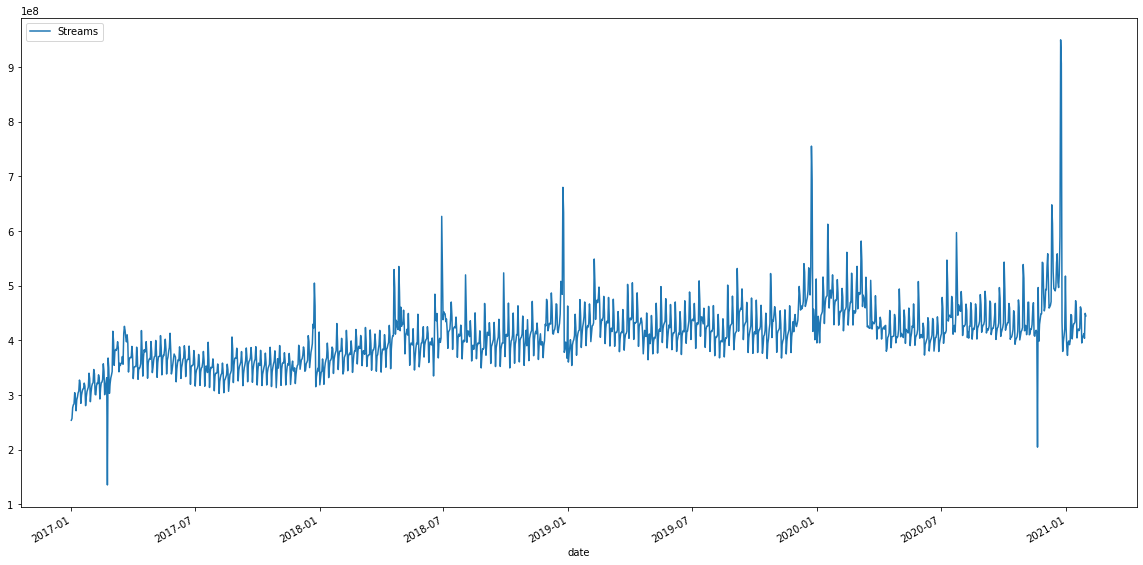

In [41]:
df.groupby("date").sum().plot(figsize=(20,10));

In [76]:
df_cleaned.to_csv("data/selected_regions_top_200_daily.csv", index=False)